In [13]:
import pandas as pd

# Create a dictionary with the variables
data = {
    'Province': ['Limburg', 'Utrecht', 'Noord-Holland', 'Friesland', 'Groningen'],
    'Water_consumption': [1, 2, 2.5, 1.5, 3],
    'Electricity_consumption': [5, 3, 2, 4, 2],
    #'Gas_consumption': [3, 2, 1, 2.5, 3],
    'Happiness': [9, 6, 6, 8, 3]
}

df = pd.DataFrame(data)
df

,Province,Water_consumption,Electricity_consumption,Happiness
0,Limburg,1.0,5,9
1,Utrecht,2.0,3,6
2,Noord-Holland,2.5,2,6
3,Friesland,1.5,4,8
4,Groningen,3.0,2,3


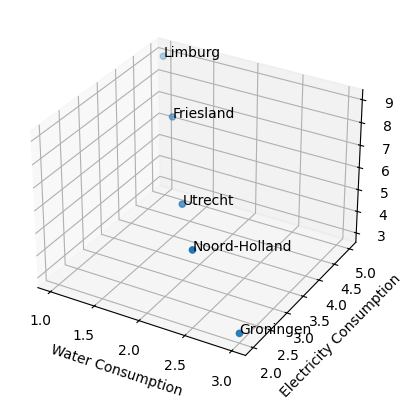

In [14]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(df['Water_consumption'], df['Electricity_consumption'], df['Happiness'])

# Label the instances in the plot
for i, txt in enumerate(df['Province']):
    ax.text(df['Water_consumption'][i], df['Electricity_consumption'][i], df['Happiness'][i], txt)

# Set labels for the axes
ax.set_xlabel('Water Consumption')
ax.set_ylabel('Electricity Consumption')
ax.set_zlabel('Happiness')

# Show the plot
plt.show()

In [ ]:
1. Y_hat = b_0 + b_1*X_1
2. Y_hat = b_0 + b_1*X_1 + b_2*X_2
3. Y_hat = b_0 + b_1*X_1 + b_2*X_2 + b_3*X_3

In [15]:
import numpy as np

X = df[['Water_consumption', 'Electricity_consumption']].to_numpy()
N = X.shape[0]
X = np.hstack((np.ones((N, 1)), X))
print('X', X)

Y = df['Happiness'].to_numpy()
print('Y', Y)

X [[1.  1.  5. ]
 [1.  2.  3. ]
 [1.  2.5 2. ]
 [1.  1.5 4. ]
 [1.  3.  2. ]]
Y [9 6 6 8 3]


In [16]:
beta_hat = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X)@Y
print('beta_hat', beta_hat)

beta_hat [21.6 -5.2 -1.5]


In [17]:
n = Y.size
p = X[0].size
errors = Y - X@beta_hat
print('e', errors)

e [ 1.0000000e-01 -7.0000000e-01  4.0000000e-01  2.0000000e-01
  2.4158453e-13]


In [18]:
sigma_square_hat = 1/(n-p) * sum(errors**2)
print(sigma_square_hat)

0.35


In [19]:
cov_beta = sigma_square_hat * np.linalg.inv(np.transpose(X) @ X)
print('Covariance matrix of beta_hat:')
print(cov_beta)

Covariance matrix of beta_hat:
[[36.47  -9.24  -5.6  ]
 [-9.24   2.38   1.4  ]
 [-5.6    1.4    0.875]]


In [20]:
se = np.sqrt(np.diag(cov_beta))
print('Standard errors of beta_hat:')
print(se)

Standard errors of beta_hat:
[6.03903966 1.54272486 0.93541435]


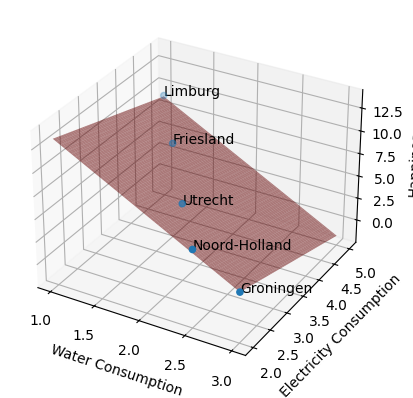

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')

# Plot the data points
ax.scatter(df['Water_consumption'], df['Electricity_consumption'], df['Happiness'])

# Label the instances in the plot
for i, txt in enumerate(df['Province']):
    ax.text(df['Water_consumption'][i], df['Electricity_consumption'][i], df['Happiness'][i], txt, color='black')

# Set labels for the axes
ax.set_xlabel('Water Consumption')
ax.set_ylabel('Electricity Consumption')
ax.set_zlabel('Happiness')

# Generate points for the line
x = np.linspace(df['Water_consumption'].min(), df['Water_consumption'].max(), 100)
y = np.linspace(df['Electricity_consumption'].min(), df['Electricity_consumption'].max(), 100)
#z = np.linspace(df['Happiness'].min(), df['Happiness'].max(), 10)

x, y = np.meshgrid(x, y)
y_hat = beta_hat[0] + beta_hat[1] * x + beta_hat[2] * y

# Plot the line
#ax.plot3D(x, y, y_hat, label='y hat')
#ax.plot_surface(x, y, y_hat)
ax.plot_surface(x, y, y_hat.reshape(x.shape), alpha=0.5, label='Regression Line', color='r')


# Show the plot
plt.show()

In [25]:
np.random.seed(0)
beta_give_or_take = np.random.multivariate_normal(mean=beta_hat, cov=cov_beta, size = 5)
beta_give_or_take

array([[10.95127548, -2.54296411,  0.23551549],
       [ 7.99498306, -2.14807867,  0.73162139],
       [15.86529883, -3.72034656, -0.64220521],
       [19.14032278, -4.55249531, -1.02086551],
       [17.00787733, -4.0435313 , -0.7557752 ]])

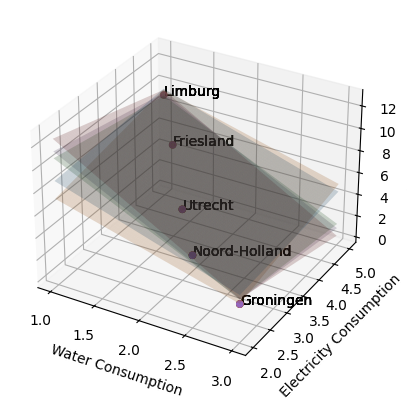

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')

for beta_hat_prime in beta_give_or_take:
    # Plot the data points
    ax.scatter(df['Water_consumption'], df['Electricity_consumption'], df['Happiness'])

    # Label the instances in the plot
    for i, txt in enumerate(df['Province']):
        ax.text(df['Water_consumption'][i], df['Electricity_consumption'][i], df['Happiness'][i], txt, color='black')

    # Set labels for the axes
    ax.set_xlabel('Water Consumption')
    ax.set_ylabel('Electricity Consumption')
    ax.set_zlabel('Happiness')

    # Generate points for the line
    x = np.linspace(df['Water_consumption'].min(), df['Water_consumption'].max(), 100)
    y = np.linspace(df['Electricity_consumption'].min(), df['Electricity_consumption'].max(), 100)
    #z = np.linspace(df['Happiness'].min(), df['Happiness'].max(), 10)

    x, y = np.meshgrid(x, y)
    y_hat = beta_hat_prime[0] + beta_hat_prime[1] * x + beta_hat_prime[2] * y

    # Plot the line
    #ax.plot3D(x, y, y_hat, label='y hat')
    #ax.plot_surface(x, y, y_hat)
    ax.plot_surface(x, y, y_hat.reshape(x.shape), alpha=0.2, label='Regression Hyperplane')


# Show the plot
plt.show()